# Sample & Confidence Intervals

_Reference_:
1. Pg. 202 - 220, _John A. Rice_, Mathematical Statistics and Data Analysis, $3^{rd}$ Edition 
2. https://en.wikipedia.org/wiki/Variance#Sample_variance
3. http://mathworld.wolfram.com/Sample.html
4. https://brilliant.org/wiki/confidence-intervals/

**Sample** as defined in Wolfram MathWorld is _a subset of a population that is obtained through some process, possibly random selection or selection based on a certain set of criteria, for the purposes of investigating the properties of the underlying parent population._ <br>
 
Let the finite size of population be _**N**_ and let the numerical value of interest associated with each element of the population be represented as $x_{1}$, $x_{2}$, $x_{3}$, $x_{4}$, ..... $x_{N}$. We will assume that the sample size is _**n**_ where _**n < N**_. Let the elements of a sample be represented as $X_{1}$, $X_{2}$, $X_{3}$, $X_{4}$, ..... $X_{n}$. Note that $X_{i}$ is a random variable with a fixed probability; meaning $X_{i}$ can take any of the _**N**_ values of population at random with a fixed probability of $\frac{1}{N}$. Also, note that $X_{i}$ is not same as $x_{i}$ as $X_{i}$ represents $i^{th}$ element of a sample; which is random whilst $x_{i}$ represents $i^{th}$ element of population which is fixed. <br>

## Example

We will be using **Istanbul Stock Exchange** dataset to understand sample statistics. The dataset is available on UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/ISTANBUL+STOCK+EXCHANGE. Data description can be found at https://www2.1010data.com/documentationcenter/beta/Tutorials/MachineLearningExamples/IstanbulDataSet.html <br>

For simplicity and ease of understanding, we will not be using the entire dataset but returns of The Financial Times Stock Exchange 100 Index which is represented by the column **FTSE** which will be our population.

#### Load necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Read the dataset and extract FTSE column**

In [3]:
# read the data
istanbul_df = pd.read_csv('data/istanbul_stock_exchange.csv', sep = ',')

# extract FTSE column
ftse_df = istanbul_df[['date', 'FTSE']]

<hr>

## Population Statistics

In [4]:
# extract and compute all population parameters and statistics
population_size = ftse_df.shape[0]
population_mean = np.mean(ftse_df.FTSE)
population_var = np.var(ftse_df.FTSE)
population_std = np.std(ftse_df.FTSE)

# print parameters
print('Population Size: ', population_size)
print('Population Mean: ', population_mean)
print('Population Variance: ', population_var)
print('Population Standard Deviation: ', population_std)

Population Size:  536
Population Mean:  0.0005102773488805969
Population Variance:  0.00015986764021781212
Population Standard Deviation:  0.012643877578409722


#### Population Distribution

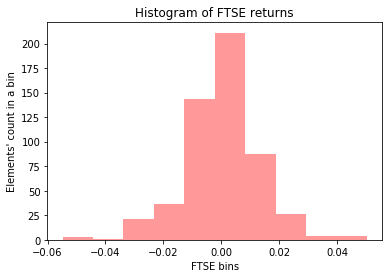

In [9]:
plt.hist(ftse_df.FTSE, color = 'r', alpha = 0.4)
plt.title('Histogram of FTSE returns')
plt.xlabel('FTSE bins')
plt.ylabel('Elements\' count in a bin')
plt.show()

The population resembles **Gaussian** a.k.a **Normal** distribution

## Generate Random Sample

We will generate a sample of size 150 ($n$ = 150) from population of size 536 ($N$ = 536)

In [6]:
# generate sample dataset
ftse_sample_df = ftse_df.sample(n = 150, random_state = 123).reset_index(drop = True)   

# sample statistics
print(ftse_sample_df.describe())

             FTSE
count  150.000000
mean     0.000983
std      0.013291
min     -0.045131
25%     -0.005349
50%      0.000456
75%      0.008362
max      0.037891


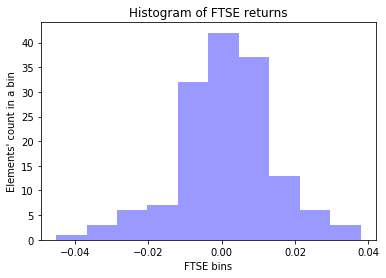

In [8]:
plt.hist(ftse_sample_df.FTSE, color = 'b', alpha = 0.4)
plt.title('Histogram of FTSE returns')
plt.xlabel('FTSE bins')
plt.ylabel('Elements\' count in a bin')
plt.show()

---
Assumptions
---

The following assumptions hold for the sections that follow:
1. Population is unavailable (we do not know anything about population and only sample information is available)
2. Population is normally distributed with mean $\mu$ and standard deviation $\sigma$
2. Samples are drawn from population **WITH** replacement (this strong assumption is crucial for statistics that will be defined in sections that follow)

Now that we do not know anything about population and we only have a sample, represented by dataframe **ftse_sample_df**, of size 150 ($n$ = 150), let's do the needful

### 1. Sample Mean

Sample Mean, represented by $\overline{X}$, is defined as

$$ \overline{X} = \frac{1}{n} \sum_{i=1}^{n} X_{i} $$

As we do not have any information about population, sample mean $\overline{X}$ is called as **Population Mean Estimate** [4] and is represented by $\hat{\mu}$

In [10]:
# calculating sample mean
n = ftse_sample_df.shape[0]
summation_X_i = np.sum(ftse_sample_df.FTSE)
sample_mean = summation_X_i * 1.0 / n

print('Sample Mean: ', sample_mean)

Sample Mean:  0.0009826696666666666


### 2. Sample Variance (Biased)

Sample Variance (biased), represented by $\sigma_{\overline{X}}^{2}$, is defined as
$$ \sigma_{\overline{X}}^{2} = \frac{1}{n} \sum_{i=1}^{n} \left(X_{i} - \overline{X}\right)^{2} $$

As we do not have any information concerning Population, the above calculated Sample Variance $\sigma_{\overline{X}}^{2}$ is called as **Population Variance Estimate (biased)**. That is, $\sigma_{\overline{X}}^{2}$ is the best possible _estimate_ of population variance $\sigma^{2}$. Also, the calculated sample variance from above is biased. It is biased by a factor of $\left( \frac{n-1}{n} \right)$.<br>

$$ \sigma_{\overline{X}}^{2} = \left( \frac{n-1}{n} \right) \sigma^{2} $$

In other words, $\sigma_{\overline{X}}^{2}$ _under-estimates_ true population variance $\sigma^{2}$ by a factor of $\left( \frac{n-1}{n} \right)$. It is under-estimate because $\left( \frac{n-1}{n} \right)$ $<$ 1. Proof can be found in _Reference_ [2]. <br>
For sampling without replacement, proof can be found in pg.211 of _Reference_ [1]. 

In [11]:
# calculating (biased) sample variance -- (biased) estimate of population variance
sample_var_biased = np.sum(np.square(ftse_sample_df.FTSE - sample_mean)) / n

print('Sample Variance (Biased) : ', sample_var_biased)

Sample Variance (Biased) :  0.00017547906365503833


### 3. Sample Variance (Unbiased)

Sample Variance (unbiased), represented by $s_{\overline{X}}^{2}$, is defined as
$$ s_{\overline{X}}^{2} = \frac{1}{n-1} \sum_{i=1}^{n} \left(X_{i} - \overline{X}\right)^{2} $$

For sampling with replacement, proof can be found in _Reference_ [2]. <br>For sampling without replacement, proof can be found in pg.212 of _Reference_ [1].

In [12]:
# calculating (unbiased) sample variance -- (unbiased) estimate of sample variance
sample_var_unbiased = np.sum(np.square(ftse_sample_df.FTSE - sample_mean)) / (n-1)

print('Sample Variance (Unbiased) : ', sample_var_unbiased)

Sample Variance (Unbiased) :  0.00017665677549164933


### 4. Sample Standard Deviation (Standard Error)

**Sample Standard Deviation** a.k.a **Standard Error**, represented by $\sigma_{\overline{X}}$, is defined as

$$ \sigma_{\overline{X}} = \frac{\sigma}{\sqrt{n}} $$

The above equation holds if we have knowledge about population variance $\sigma^{2}$. In real-world scenarios we will not have any information concerning population. As a reuslt, we can never know population variance $\sigma^{2}$. In such cases, the unbiased population variance estimate $s_{\overline{X}}^{2}$, derived from available sample, is used. The above equation is then re-written as

$$ \sigma_{\overline{X}} = \frac{s_{\overline{X}}^{2}}{\sqrt{n}}$$

In [13]:
# calculating sample standard deviation

# if we know population variance
sample_std_using_pop_var = np.sqrt(population_var / n)

# if we do not know population variance, use unbiased sample variance
sample_std_using_sample_var = np.sqrt(sample_var_unbiased / n)

print('Standard Error (Population Variance known): ', sample_std_using_pop_var)
print('Standard Error (Population Variance unknown): ', sample_std_using_sample_var)

Standard Error (Population Variance known):  0.0010323682812440275
Standard Error (Population Variance unknown):  0.0010852243254788365


### 5. Confidence Intervals

Confidence Interval is a region of fixed size that is constructed using sample (derived from population). This constructed interval contains population statistic of interest with certain probability. In English,  Confidence Interval is the probability with which some value lies in a region. [4]

From a population of size **N**, we can draw several samples of size **n**. On the lower bound, using sampling without replacement, we can draw $N \choose n$ samples. Using sampling with replacement, the count of number of smaples that can be drawn greatly increases. In a nutshell, from a population of size **N**, several samples of size **n** (where **n** $<$ **N**) can be drawn at random. Therefore, sample means i.e. means associated with individual samples follow a probability distribution known as **Sampling Distribution of Sample Means**. Likewise, each sample also has a variance associated with it and these variances follow probaility distribution known as **Sampling Distribution of Sample Variance**.

As sample mean $\overline{X}$ is an estimate of population mean $\mu$, it is necessary to provide a confidence interval for the sample mean. It is so because, the interval provides us an intuition as to probability with which population mean $\mu$ is contained within the interval.

#### 5.1 Confidence Interval for Population Mean (Population Standard Deviation $\sigma$ is known)

Given, 
1. **Level of Significance** $\alpha$, 
2. Population mean $\mu$ is known. This is not known in real-world scenarios but assuming that we know it <br><br>
We can define $100 \left( 1 - \alpha \right) $% confidence interval for population mean $\mu$ as

$$ \lbrack \overline{X} - Z_{\frac{\alpha}{2}}.\frac{\sigma}{\sqrt{n}},  \overline{X} + Z_{\frac{\alpha}{2}}.\frac{\sigma}{\sqrt{n}} \rbrack $$

**Note**: 
$$ \frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}} $$
follows standard normal distribution $Z$.

#### 5.2 Confidence Interval for Population Mean (Population Standard Deviation $\sigma$ is unknown)

Given, 
1. **Level of Significance** $\alpha$, 
2. Population mean $\mu$ is unknown <br><br>
We can define $100 \left( 1 - \alpha \right) $% confidence interval for population mean $\mu$ as

$$ \lbrack \overline{X} - t_{\frac{\alpha}{2}}.\frac{s_{\overline{X}}}{\sqrt{n}},  \overline{X} + t_{\frac{\alpha}{2}}.\frac{s_{\overline{X}}}{\sqrt{n}} \rbrack $$

**Note**: 
$$ \frac{\overline{X} - \mu}{\frac{s_{\overline{x}}}{\sqrt{n}}} $$
follows $t$-distribution with (n-1) degrees of freedom.

#### 5.3 Confidence Interval for Population Variance

Given, **Level of Significance** $\alpha$, we can define 100(1 - $\alpha$)% confidence interval for population variance $\sigma^{2}$ as

$$ \lbrack \frac{(n-1)s^{2}}{c_{\frac{\alpha}{2}}}, \frac{(n-1)s^{2}}{c_{1 - \frac{\alpha}{2}}} \rbrack $$

where $c_\frac{\alpha}{2}$ is $\chi_{\frac{\alpha}{2}}^{2}$ distribution value with ($n$ - 1) degrees of freedom. <br>
$c_{1 - \frac{\alpha}{2}}$ is $\chi_{1 - {\frac{\alpha}{2}}}^{2}$ distribution value with ($n$ - 1) degrees of freedom. 

**Note**: 
$$\frac{(n-1)s^{2}}{\sigma^{2}}$$ 
follows $\chi^{2}$ distribution with ($n$ - 1) degrees of freedom.